In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [178]:
alpha = 0.1
min_dist = 5
seed = np.random.randint(2**31)
# seed = 1839123614
# print(seed)
np.random.seed(seed)
ngroups=25
nppg = 6
npoints = ngroups*nppg
ibox_size = 10
ibox_offset= 0

while 1:
    points = ibox_size*np.random.random(size=(npoints,2)) - ibox_size/2
    iter = 0
    dist_mat = pdist(points)
    while np.min(dist_mat) < min_dist:
        updates = np.zeros(points.shape)
        for i,point in enumerate(points):
            diffs = point - points
            norms = np.linalg.norm(diffs, axis=1, keepdims=True)
            directions = np.nan_to_num(diffs/norms)
            forces = alpha * directions * np.nan_to_num(1/norms**(1))
            updates[i] = np.sum(forces, axis=0)

        points += updates
        dist_mat = pdist(points)
        iter += 1
    if np.max(points[:,1]) - np.min(points[:,1]) > 86:
        seed = np.random.randint(2**31)
        np.random.seed(seed)        
        print('reseeding')
        print(seed)
    else:
        break

C:\Users\ttktt\AppData\Local\Temp\ipykernel_24012\3793022088.py:22: RuntimeWarning: invalid value encountered in divide
  directions = np.nan_to_num(diffs/norms)
C:\Users\ttktt\AppData\Local\Temp\ipykernel_24012\3793022088.py:23: RuntimeWarning: divide by zero encountered in divide
  forces = alpha * directions * np.nan_to_num(1/norms**(1))


reseeding
1190118081
reseeding
2032589040
reseeding
1076258949
reseeding
1411008165
reseeding
1178630134
reseeding
1584828869
reseeding
718840572
reseeding
2140473848
reseeding
1584987361
reseeding
1588701675
reseeding
220706241
reseeding
660415450
reseeding
2052108061
reseeding
727923007


In [27]:
print(np.max(points[:,1]))
print(np.min(points[:,1]))
print(points)

42.330949720084405
-43.08846758172411
[[ 17.71974544  25.6392412 ]
 [ 24.02544021  28.89975523]
 [ -7.9207154  -23.45556915]
 [-24.99406358  -5.24386251]
 [-33.73249696  28.93799889]
 [-39.73017746  18.78936428]
 [-24.29099191 -37.35267218]
 [ 16.10032268 -32.80512667]
 [ 11.39449528 -23.73117243]
 [-31.29858159 -32.16125864]
 [ -9.61681379  40.86057593]
 [ 17.71702214   5.34800314]
 [-18.20045953  22.5690481 ]
 [ 13.70661641  34.40308487]
 [ 22.70867056  -3.37339841]
 [ 43.05119206   0.51843155]
 [ -1.56141697  18.37400954]
 [ 21.02291236 -36.59249255]
 [ -9.21858888   8.69207221]
 [ 42.61824851  -9.32705248]
 [ 19.40047032 -17.05446992]
 [  9.21567069  -7.79736132]
 [-30.03694955  18.44908269]
 [-24.10541482 -31.0629422 ]
 [ -7.17656168 -15.25768875]
 [ 25.19721557  15.45639631]
 [-15.82390745  14.13782457]
 [ -9.97555707  -0.79126518]
 [  2.4727332   38.54468304]
 [-14.61752992 -38.32755859]
 [ 18.89392413  32.20437857]
 [ 23.42414235 -29.15467387]
 [-20.56287043 -20.42825545]
 [-30

In [28]:
from tikz import *

In [29]:
color_list = ['Crimson', 'orange', 'Copper', 'Green', 'RoyalBlue', 'RichLavender']

In [30]:
pic = Picture()
pic.usetikzlibrary('shapes.geometric')
pic.usepackage(r'fontspec')
pic.add_preamble(r'\setmainfont{TeX Gyre Schola}')
pic.usepackage(r'contour')
pic.definecolor('Green','HTML','00A550')
pic.definecolor('RichLavender','HTML','A76BCF')
pic.definecolor('RoyalBlue','HTML','4169E1')
pic.definecolor('Crimson', 'HTML', 'DC143C')
pic.definecolor('Copper', 'HTML', '7B3F00')

pic.node('', at=(0,0), draw=True, ultra_thick=True, circle=True, minimum_width='175mm', fill='white')

for i in range(6):
    for point in points[6*i:6*(i+1)]:
        #pic.node(r'\contour{black}{' + str(i+1) + '}', at=tuple(point/6), draw='white', star=True, star_points=7, fill=color_list[i], text='white', inner_sep='0.5pt', font=r'\bfseries')
        pic.node(str(i+1), at=tuple(point/6), draw='white', star=True, star_points=7, fill=color_list[i], text='white', inner_sep='0.5pt', font=r'\bfseries')

for i in range(6,9):
    for point in points[6*i:6*(i+1)]:
        pic.node('', at=tuple(point/6), draw='white', circle=True, fill='lightgray', inner_sep='3pt')
        
for i in range(9,13):
    for point in points[6*i:6*(i+1)]:
        pic.node('', at=tuple(point/6), draw='white', circle=True, fill='lightgray', inner_sep='2pt')

for i in range(13,17):
    for point in points[6*i:6*(i+1)]:
        pic.node('', at=tuple(point/6), draw='white', circle=True, fill='lightgray', inner_sep='1.5pt')

pic.node(r'\setmainfont[Scale=1.6]{Ubuntu}\Huge X', at=(8.25, -8.25), text='lightgray!50')
pic.node('', at=(8.25, -8.25), draw='black', ultra_thick=True, minimum_size='10mm', rounded_corners='2mm')
pic.node(r'\setmainfont[Scale=1.6]{Ubuntu}\Huge X', at=(8.25, -7.0), text='lightgray!50')
pic.node('', at=(8.25, -7.0), draw='black', ultra_thick=True, minimum_size='10mm', rounded_corners='2mm')
pic.node(r'\setmainfont[Scale=1.6]{Ubuntu}\Huge X', at=(8.25, -5.75), text='lightgray!50')
pic.node('', at=(8.25, -5.75), draw='black', ultra_thick=True, minimum_size='10mm', rounded_corners='2mm')
# pic.node(r'{\setmainfont{Boecklins Universe}\LARGE Strikes}', at=(7.0, -7.625), anchor='south')

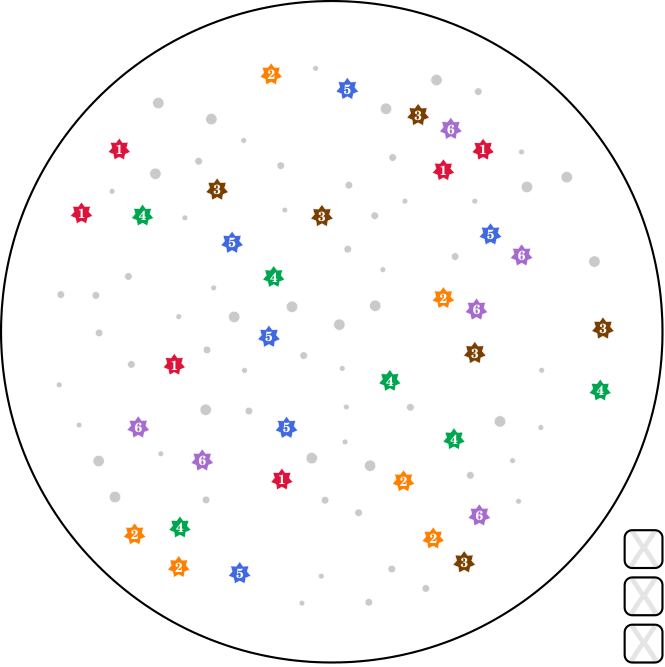

In [31]:
pic

In [32]:
tikz_code = pic.code()

In [33]:
f = open('starfield_diagram.tex', 'w')
f.write(tikz_code)
f.close()

In [179]:
color_list = ['black'] * 6

In [180]:
pic = Picture()
pic.usetikzlibrary('shapes.geometric')

for point in points[:6]:
    pic.node(r'\phantom{1}', at=tuple(point/6), draw=color_list[0], circle=True, inner_sep='1.875pt', line_width='0.9mm')

for point in points[6:12]:
    pic.node(r'\rule{7mm}{1mm}', at=tuple(point/6), text=color_list[1], rotate=45, inner_sep='0pt')
    pic.node(r'\rule{7mm}{1mm}', at=tuple(point/6), text=color_list[1], rotate=-45, inner_sep='0pt')

for point in points[12:18]:
    pic.node(r'\phantom{1}', at=tuple(point/6), regular_polygon=True, regular_polygon_sides=3, fill=color_list[2], inner_sep='0.0pt')

for point in points[18:24]:
    pic.node(r'\phantom{1}', at=tuple(point/6), draw=color_list[3], diamond=True, inner_sep='0.8pt', line_width='0.9mm')

for point in points[24:30]:
    pic.node(r'\phantom{1}', at=tuple(point/6), star=True, star_points=5, star_point_ratio=2, fill=color_list[4], inner_sep='0.3pt')

for point in points[30:36]:
    pic.node(r'\phantom{1}', at=tuple(point/6), regular_polygon=True, regular_polygon_sides=6, fill=color_list[5], inner_sep='2.2pt')

for i in range(6,9):
    for point in points[6*i:6*(i+1)]:
        pic.node('', at=tuple(point/6), draw='white', circle=True, fill='lightgray', inner_sep='3pt')
        
for i in range(9,13):
    for point in points[6*i:6*(i+1)]:
        pic.node('', at=tuple(point/6), draw='white', circle=True, fill='lightgray', inner_sep='2pt')

for i in range(13,17):
    for point in points[6*i:6*(i+1)]:
        pic.node('', at=tuple(point/6), draw='white', circle=True, fill='lightgray', inner_sep='1.5pt')

# pic.node(r'\setmainfont[Scale=1.6]{Ubuntu}\Huge X', at=(8.25, -8.25), text='lightgray!50')
# pic.node('', at=(8.25, -8.25), draw='black', ultra_thick=True, minimum_size='10mm', rounded_corners='2mm')
# pic.node(r'\setmainfont[Scale=1.6]{Ubuntu}\Huge X', at=(8.25, -7.0), text='lightgray!50')
# pic.node('', at=(8.25, -7.0), draw='black', ultra_thick=True, minimum_size='10mm', rounded_corners='2mm')
# pic.node(r'\setmainfont[Scale=1.6]{Ubuntu}\Huge X', at=(8.25, -5.75), text='lightgray!50')
# pic.node('', at=(8.25, -5.75), draw='black', ultra_thick=True, minimum_size='10mm', rounded_corners='2mm')


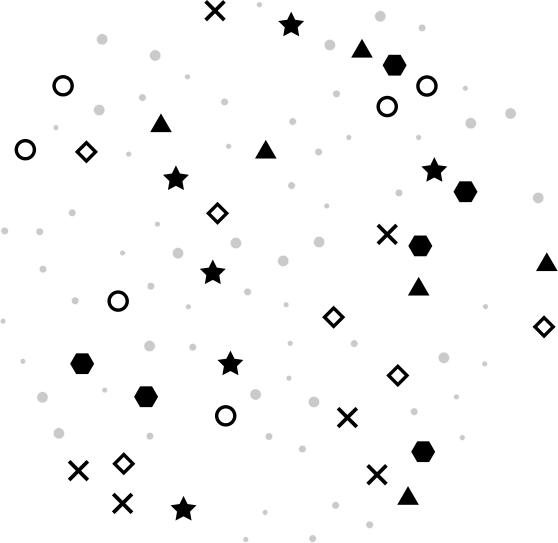

In [181]:
pic

In [182]:
tikz_code = pic.code()
print(tikz_code)

\begin{tikzpicture}
\node[draw=black,circle,inner sep=1.875pt,line width=0.9mm] at (2.95329,4.27321) {\phantom{1}};
\node[draw=black,circle,inner sep=1.875pt,line width=0.9mm] at (4.00424,4.81663) {\phantom{1}};
\node[draw=black,circle,inner sep=1.875pt,line width=0.9mm] at (-1.32012,-3.90926) {\phantom{1}};
\node[draw=black,circle,inner sep=1.875pt,line width=0.9mm] at (-4.16568,-0.87398) {\phantom{1}};
\node[draw=black,circle,inner sep=1.875pt,line width=0.9mm] at (-5.62208,4.823) {\phantom{1}};
\node[draw=black,circle,inner sep=1.875pt,line width=0.9mm] at (-6.6217,3.13156) {\phantom{1}};
\node[text=black,rotate=45,inner sep=0pt] at (-4.0485,-6.22545) {\rule{7mm}{1mm}};
\node[text=black,rotate=-45,inner sep=0pt] at (-4.0485,-6.22545) {\rule{7mm}{1mm}};
\node[text=black,rotate=45,inner sep=0pt] at (2.68339,-5.46752) {\rule{7mm}{1mm}};
\node[text=black,rotate=-45,inner sep=0pt] at (2.68339,-5.46752) {\rule{7mm}{1mm}};
\node[text=black,rotate=45,inner sep=0pt] at (1.89908,-3.9552) {\ru

In [183]:
f = open('starfield_diagram_minimal.tex', 'w')
f.write(tikz_code)
f.close()

In [184]:
from pylatex import Document, TikZ
from pylatex import Package, Command
from pylatex.utils import italic, bold, NoEscape
from pylatex.basic import NewLine

In [185]:
geometry_options = {'margin': '10mm'}
doc = Document(documentclass = 'scrartcl',
               document_options = ["paper=a4","parskip=half"],
               fontenc=None,
               inputenc=None,
               lmodern=False,
               textcomp=False,
               page_numbers=False,
               geometry_options=geometry_options)

doc.packages.append(Package('tikz'))
doc.packages.append(Package('fontspec'))
doc.packages.append(Package('enumitem'))
doc.packages.append(Package('multicol'))
doc.packages.append(Package('booktabs'))
doc.packages.append(Package('epsdice'))
doc.packages.append(Package('astrollogy'))

doc.preamble.append(Command('usetikzlibrary', 'shapes.geometric'))
doc.preamble.append(Command('setkomafont', NoEscape(r'section}{\setmainfont{Century Gothic}\LARGE\bfseries\center')))
doc.preamble.append(Command('RedeclareSectionCommand', 'section', ([r'runin=false', NoEscape(r'afterskip=0.0\baselineskip'), NoEscape(r'beforeskip=1.0\baselineskip')])))
doc.change_length("\columnsep", "10mm")

doc.append(Command(NoEscape(r'begin{center}')))
doc.append(NoEscape(tikz_code))
doc.append(Command(NoEscape(r'end{center}')))

doc.append(NoEscape(r'{\setmainfont[Scale=2.4]{Century Gothic}\Huge\begin{center}A S T R O L L O G Y\end{center}}'))

doc.append(Command(r'vspace{1mm}'))
doc.append(Command(NoEscape(r'setmainfont[Scale=0.95]{Century Gothic}')))
doc.append(Command(NoEscape(r'raggedright')))

doc.append(Command(r'begin{multicols}{2}'))
f = open('astrollogy_rules_text.tex')
rules_text = f.read()
f.close()
doc.append(NoEscape(rules_text))
doc.append(Command(r'vfill'))
doc.append(NoEscape(r"\textbf{Random Seed:} %i\\\textbf{Design:} Michael~Purcell, Kyle~``KYNG''~Jarratt\vfill\null" % seed))
doc.append(Command(r'end{multicols}'))

doc.append(Command(r'vspace{-5mm}'))

doc.append(NoEscape(r'{\setmainfont[Scale=0.95]{Century Gothic}\Huge\raisebox{-0.25ex}{\epsdice{1}} = \tikz{\pic {onestar}} \hfill \raisebox{-0.25ex}{\epsdice{2}} = \tikz{\pic {twostar}} \hfill \raisebox{-0.25ex}{\epsdice{3}} = \tikz{\pic {threestar}} \hfill \raisebox{-0.25ex}{\epsdice{4}} = \tikz{\pic {fourstar}} \hfill \raisebox{-0.25ex}{\epsdice{5}} = \tikz{\pic {fivestar}} \hfill \raisebox{-0.25ex}{\epsdice{6}} = \tikz{\pic {sixstar}}}'))

doc.generate_tex('astrollogy_starfield_%i' % seed)

In [149]:
pylatex.basic.NewLine?

In [186]:
doc.generate_pdf?